### Exercício #1

Utilizando do dataset Iris (embarcado no scikit-learn, from sklearn
import datasets - datasets.load_iris() ), configure uma Rede Neural MLP
para classificar as amostras de plantas nas 3 classes presentes no
dataset.

## Definição do problema

Para resolução do problema utilizaremos o famoso conjunto de dados IRIS Flower. O nosso conjunto de dados consiste em 50 amostras de cada uma das três espécies de flores Iris.

### Informações dos atributos

1.  sepal length in cm - **Comprimento da sépala em cm**
2.  sepal width in cm - **Largura da sépala em cm**
3.  petal length in cm - **Comprimento da pétala em cm**
4.  petal width in cm - **Largura da pétala em cm**
5.  class - **espécies estudadas**
    1.  **Iris Setosa**
    2.  **Iris Versicolour**
    3.  **Iris Virginica**

Quatro características (variáveis) foram medidas de cada amostra, são elas o comprimento e a largura da sépala e da pétala, em centímetros.

In [16]:
#@title Importação das bibliotecas

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from google.colab import drive

In [17]:
#@title Carregamento da base
from sklearn import datasets
iris = datasets.load_iris()

In [18]:
#@title Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#@title Criação do dataframe para uma melhor visualização e exploração dos dados
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
126,6.2,2.8,4.8,1.8,2
35,5.0,3.2,1.2,0.2,0
83,6.0,2.7,5.1,1.6,1
104,6.5,3.0,5.8,2.2,2


### Verificação de dados nulos

Aqui nós vamos verificar os dados nulos do nosso modelo, além disso colocamos o resultado em um DataFrame para exibir o total encontrado X a proporção de valores nulos do nosso modelo.

In [20]:
df.isnull().mean(axis=1).loc[:10]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

In [21]:
df.isnull() # Aqui verificamos o total de null na base se existir
df.isnull().sum()/len(df) # Aqui obtemos a proporção de null se existir

# Criamos um novo DataFrame para verificar o total e a proporção de null na base
pd.DataFrame(zip(df.isnull().sum(),df.isnull().sum()/len(df)), columns=['Count', 'Proportion'], index=df.columns)

,Count,Proportion
sepal length (cm),0,0.0
sepal width (cm),0,0.0
petal length (cm),0,0.0
petal width (cm),0,0.0
target,0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [23]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

### Observações finais

*   Não contém valores nulos
*   O número total de observações é de 150, removemos um valor duplicado
*   Os tipos com exceção do target são do tipo float64
*   No final acreditamos que os dados estão bons para separar em treino e testes sem nenhuma transformação ou alteração 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])               

In [27]:
history = model.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=4, validation_data=(x_test, y_test))

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 1.3073 - accuracy: 0.4900 - val_loss: 0.8464 - val_accuracy: 0.6800
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7489 - accuracy: 0.7100 - val_loss: 0.5919 - val_accuracy: 0.7800
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6230 - accuracy: 0.7400 - val_loss: 0.5326 - val_accuracy: 0.6800
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.7100 - val_loss: 0.4230 - val_accuracy: 0.8200
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.7800 - val_loss: 0.3822 - val_accuracy: 0.8200
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7900 - val_loss: 0.3412 - val_accuracy: 0.9800
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8900 - val_loss: 0.3377 - val_accuracy: 0.8200
Epoch 8/50
25/25 [=

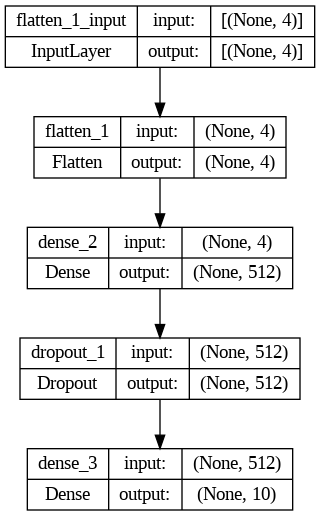

In [28]:
plot_model(model, to_file='iris.png', show_shapes=True, show_layer_names=True)

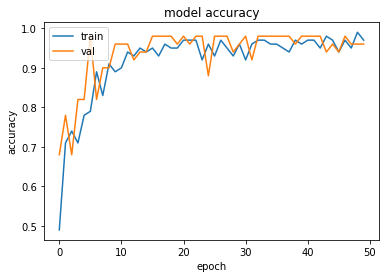

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9599999785423279


In [49]:
y_pred_out = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [50]:
y_pred_out

array([[5.66352450e-04, 9.74688768e-01, 2.45874207e-02, 2.37655295e-05,
        3.62551800e-05, 1.39415388e-05, 2.27082382e-05, 1.60262716e-05,
        8.46865714e-06, 3.62692881e-05],
       [9.99289274e-01, 7.10653083e-04, 1.78996453e-11, 4.38600374e-08,
        3.31559527e-08, 1.28168161e-08, 3.51484175e-08, 6.67479183e-09,
        1.76532513e-08, 6.29232701e-08],
       [8.46991755e-10, 6.99956960e-04, 9.99300003e-01, 1.67810867e-08,
        3.66909632e-08, 1.06772093e-08, 1.24423227e-08, 1.42880667e-08,
        4.13273149e-09, 1.91877181e-08],
       [5.05699078e-04, 9.31391060e-01, 6.78899363e-02, 3.40574770e-05,
        4.88261394e-05, 2.03498803e-05, 2.97411207e-05, 2.20636484e-05,
        1.19990582e-05, 4.62926873e-05],
       [3.11700802e-04, 9.73312020e-01, 2.62949299e-02, 1.22432130e-05,
        2.02711835e-05, 7.02731359e-06, 1.12546822e-05, 8.06967455e-06,
        4.12908867e-06, 1.82257954e-05],
       [9.98493314e-01, 1.50583626e-03, 1.69839504e-10, 1.86325522e-07,
   

In [51]:
y_pred_out > 0.5

array([[False,  True, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, 

In [52]:
y_pred_classes = (y_pred_out > 0.5).astype(int) 
y_pred_classes

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0,

In [54]:
scores = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0851 - accuracy: 0.9600


In [55]:
#@title Acurácia do nosso modelo

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 96.00%


### Considerações finais

Concluimos que todas as 4 variáveis ​​de entrada são numéricas e cada instância descreve as propriedades de uma medida de flor observada e a variável de saída é uma espécie de íris específica.

Este é um problema de classificação multiclasse, o que significa que existem mais de duas classes a serem previstas.

O nosso modelo chegou em uma acurácia de 96%. Isso fornece um bom alvo para apontar a espécie de íris a partir de:

1.  sepal length in cm - **Comprimento da sépala em cm**
2.  sepal width in cm - **Largura da sépala em cm**
3.  petal length in cm - **Comprimento da pétala em cm**
4.  petal width in cm - **Largura da pétala em cm**
5.  class - **espécies estudadas**
    1.  **Iris Setosa**
    2.  **Iris Versicolour**
    3.  **Iris Virginica**

